+-----------------------------+
|         Root Finding        |
+------------+----------------+
| Method No. |  Method Name   |
+------------+----------------+
|     1      |   Bisection    |
|     2      | False Position |
|     3      | Newton Raphsan |
|     4      |     Secant     |
+------------+----------------+
The estimated root of the given function using Secant Method : 1.5873729981431273


,Iteration,xi,Error(%)
,1,1.027027,NULL
,2,1.053227,2.487585644404896%
,3,1.925647,45.30528940332279%
,4,1.466878,31.275161065395974%
,5,1.564025,6.211307334335483%
,6,1.589289,1.589660008935609%
,7,1.587373,0.12069867980362341%


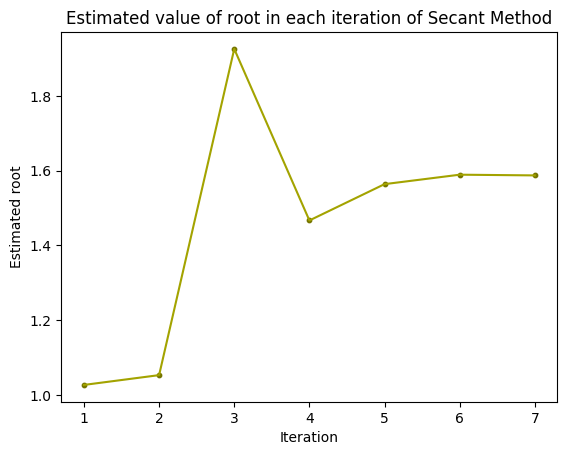

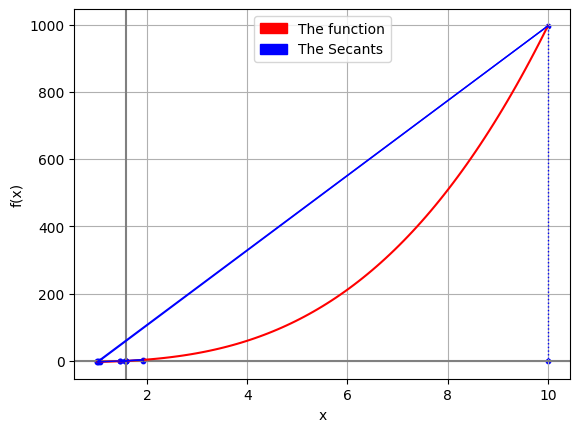

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import math

def rootExists(expr, a, b):
    fa = f(expr, a)
    fb = f(expr, b)
    return fa*fb < 0


def f(expr, val):
    return eval(expr, {"x": val})


def bisection(expr, _a, _b, tol):
    stk, colIndex, colA, colB, colC, colFa, colFb, colFc, colError = (
        [] for i in range(9))
    stk.append((_a, _b))
    root = 0
    itr = 1

    while stk:
        interval = stk.pop()
        a = interval[0]
        b = interval[1]

        if np.sign(f(expr, a)) == np.sign(f(expr, b)):
            raise Exception("The scalars a and b do not bound a root")

        m = (a + b)/2

        colIndex.append(itr)
        colA.append(a)
        colB.append(b)
        colC.append(m)
        colFa.append(f(expr, a))
        colFb.append(f(expr, b))
        colFc.append(f(expr, m))
        if itr == 1:
            colError.append("NULL")
        else:
            err = abs(m - colC[len(colC)-2])/m
            colError.append(str(round(err*100, 6)) + "%")

        if np.abs(f(expr, m)) < tol:
            root = m
            break

        elif np.sign(f(expr, a)) == np.sign(f(expr, m)):
            stk.append((m, b))

        elif np.sign(f(expr, b)) == np.sign(f(expr, m)):
            stk.append((a, m))
        itr += 1

    print(
        "\033[1m" + "The estimated root of the given function using Bisection Method : {ans}".format(ans=root) + "\033[0m")

    d = {"Iteration": colIndex, "Initial Value(a)": colA, "Last Value(b)": colB,
         "Middle Point(c) = ⟮a+b⟯ / 2": colC, "𝑓⟮a⟯": colFa, "𝑓⟮b⟯": colFb, "𝑓⟮c⟯": colFc, "Error(%)": colError}
    tabledf = pd.DataFrame(data=d)
    blankIndex = [''] * len(tabledf)
    tabledf.index = blankIndex
    display(tabledf)
    
    colX, colFx = ([] for i in range(2))
    itr = _a
    end = _b
    inc = (_b-_a)/100
    while itr <= end:
        colX.append(itr)
        colFx.append(f(expr, itr))
        itr += inc

    plt.figure(1) 
    plt.plot(colIndex,colC,"gray")
    plt.title("Estimated value of root in each iteration of Bisection method")
    plt.xlabel("Iteration")
    plt.ylabel("Estimated root")
    plt.scatter(colIndex,colC,color="#5A5A5A",s=10)

    plt.figure(2) 
    plt.axhline(y = 0, color ="gray")
    plt.axvline(x = root,color="gray")
    plt.plot(colX,colFx,"red")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    for i in range(len(colA)):
        x1 = colA[i]
        x2 = colB[i]
        x3 = colC[i]
        y1 = f(expr,x1)
        y2 = f(expr,x2)
        y3 = f(expr,x3)
        est_root = plt.scatter([x1,x2,x3],[y1,y2,y3],s=10,color="blue")
        plt.scatter([x1,x2,x3],[0,0,0],s=10,color="blue")
        plt.plot([x1, x1], [y1, 0], linewidth=1, color='blue',linestyle = 'dotted')
        plt.plot([x2, x2], [y2, 0], linewidth=1, color='blue',linestyle = 'dotted')
        plt.plot([x3, x3], [y3, 0], linewidth=1, color='blue',linestyle = 'dotted')
    fg = mpatches.Patch(color='red')
    plt.legend([fg,est_root],['The function','Estimated root'])
    plt.grid()

    plt.show()

    return root

def false_position(expr, _a, _b, tol):
    stk, colIndex, colA, colB, colC, colFa, colFb, colFc, colError = (
        [] for i in range(9))
    stk.append((_a, _b))
    root = 0
    itr = 1

    while stk:
        interval = stk.pop()
        a = interval[0]
        b = interval[1]

        if np.sign(f(expr, a)) == np.sign(f(expr, b)):
            raise Exception("The scalars a and b do not bound a root")

        m = ((a*f(expr, b))-(b*f(expr, a)))/(f(expr, b)-f(expr, a))

        colIndex.append(itr)
        colA.append(a)
        colB.append(b)
        colC.append(m)
        colFa.append(f(expr, a))
        colFb.append(f(expr, b))
        colFc.append(f(expr, m))
        if itr == 1:
            colError.append("NULL")
        else:
            err = abs(m - colC[len(colC)-2])/m
            colError.append(str(round(err*100, 6)) + "%")

        if np.abs(f(expr, m)) < tol:
            root = m
            break

        elif np.sign(f(expr, a)) == np.sign(f(expr, m)):
            stk.append((m, b))

        elif np.sign(f(expr, b)) == np.sign(f(expr, m)):
            stk.append((a, m))
        itr += 1

    print(
        "\033[1m" + "The estimated root of the given function using False position Method : {ans}".format(ans=root) + "\033[0m")

    d = {"Iteration": colIndex, "Initial Value(a)": colA, "Last Value(b)": colB,
         "Estimated root(c)": colC, "𝑓⟮a⟯": colFa, "𝑓⟮b⟯": colFb, "𝑓⟮c⟯": colFc, "Error(%)": colError}
    tabledf = pd.DataFrame(data=d)
    blankIndex = [''] * len(tabledf)
    tabledf.index = blankIndex
    display(tabledf)
   
    colX, colFx = ([] for i in range(2))
    itr = _a
    end = _b
    inc = (_b-_a)/100
    while itr <= end:
        colX.append(itr)
        colFx.append(f(expr, itr))
        itr += inc

    plt.figure(1) 
    plt.plot(colIndex,colC,"#097969")
    plt.title("Estimated value of root in each iteration of False position method")
    plt.xlabel("Iteration")
    plt.ylabel("Estimated root")
    plt.scatter(colIndex,colC,color="#008631",s=10)
    

    plt.figure(2) 
    plt.axhline(y = 0, color ="gray")
    plt.axvline(x = root,color="gray")
    plt.plot(colX,colFx,"red",label="The function")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    for i in range(len(colA)):
        x1 = colA[i]
        x2 = colB[i]
        x3 = colC[i]
        y1 = f(expr,x1)
        y2 = f(expr,x2)
        y3 = f(expr,x3)
        plt.scatter([x1,x2],[y1,y2],s=10,color="red")
        plt.scatter(x3,0,s=10,color="blue")
        plt.plot([x1, x2], [y1, y2], linewidth=1, color='blue')
    fg = mpatches.Patch(color='red')
    secant = mpatches.Patch(color='blue')
    plt.legend([fg,secant],['The function','The secants'])
    plt.grid()

    plt.show()

    return root

def newton_raphsan(expr, dxexpr, x0, tol):
    stk, itr, xn, fxn, fdxn, x1n = ([] for i in range(6))
    stk.append(x0)
    root = x0
    i = 1

    while stk:
        x = stk.pop()
        fx = f(expr, x)
        fdx = f(dxexpr, x)
        x1 = x - fx/fdx

        itr.append(i)
        xn.append(x)
        fxn.append(fx)
        fdxn.append(fdx)
        x1n.append(x1)

        if abs(f(expr, x)) < tol:
            root = x
            break
        else:
            stk.append(x1)
        i += 1

    print(
        "\033[1m" + "The estimated root of the given function using Newton Raphson Method : {ans}".format(ans=root) + "\033[0m")

    d = {"Iteration": itr, "xn": xn, "f(xn)": fxn,
         "f_prime(xn)": fdxn, "xn1": x1n}
    tabledf = pd.DataFrame(data=d)
    blankIndex = [''] * len(tabledf)
    tabledf.index = blankIndex
    display(tabledf)

    colX, colFx = ([] for i in range(2))
    i = min(xn)
    end = max(xn)
    inc = (end-i)/100

    while i <= end:
        colX.append(i)
        colFx.append(f(expr, i))
        i += inc

    plt.figure(1)
    plt.plot(itr, xn, "#3F00FF")
    plt.title("Estimated value of root in each iteration of Newton Raphson method")
    plt.xlabel("Iteration")
    plt.ylabel("Estimated root")
    plt.scatter(itr, xn, color="#0047AB", s=10)

    plt.figure(2)
    plt.axhline(y=0, color="gray")
    plt.axvline(x=root, color="gray")
    plt.plot(colX, colFx, "red", label="The function")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    for i in range(len(xn)):
        x1 = xn[i]
        x2 = x1n[i]
        y1 = f(expr, x1)
        y2 = 0
        plt.scatter([x1, x2], [y1, y2], s=10, color="red")
        plt.scatter(x1, 0, s=10, color="blue")
        plt.plot([x1, x2], [y1, y2], linewidth=1, color='blue')
        plt.plot([x1, x1], [y1, y2], linewidth=1,
                 color='blue', linestyle='dotted')
    fg = mpatches.Patch(color='red')
    secant = mpatches.Patch(color='blue')
    plt.legend([fg,secant],['The function','The Slope'])
    plt.grid()

    plt.show()

    return root

def secant(expr, x0, x1, tol):
    itr, xn, err = ([] for i in range(3))
    f_x0 = f(expr, x0)
    f_x1 = f(expr, x1)
    iteration_counter = 1
    root = x0
    _x0 = x0
    _x1 = x1

    while abs(f_x1) > tol and iteration_counter < 100:
        try:
            denominator = float(f_x1 - f_x0)/(x1 - x0)
            x = x1 - float(f_x1)/denominator
        except ZeroDivisionError:
            print("Error! - denominator zero for x = ", x)
        itr.append(iteration_counter)
        xn.append(x)
        if iteration_counter == 1:
            err.append("NULL")
        else:
            e = (abs(x-x1)/x)*100
            err.append(str(e)+"%")
        x0 = x1
        x1 = x
        f_x0 = f_x1
        f_x1 = f(expr, x1)
        iteration_counter += 1
    if abs(f_x1) > tol:
        iteration_counter = -1

    root = x

    print(
        "\033[1m" + "The estimated root of the given function using Secant Method : {ans}".format(ans=x) + "\033[0m")

    d = {"Iteration": itr, "xi": xn, "Error(%)": err}
    tabledf = pd.DataFrame(data=d)
    blankIndex = [''] * len(tabledf)
    tabledf.index = blankIndex
    display(tabledf)

    plt.figure(1)
    plt.plot(itr, xn, "#A3A300")
    plt.title("Estimated value of root in each iteration of Secant Method")
    plt.xlabel("Iteration")
    plt.ylabel("Estimated root")
    plt.scatter(itr, xn, color="#757500", s=10)

    xn.insert(0, _x1)
    xn.insert(0, _x0)
    _a = min(xn)
    _b = max(xn)
    colX, colFx = ([] for i in range(2))
    inc = (_b-_a)/100
    while _a <= _b:
        colX.append(_a)
        colFx.append(f(expr, _a))
        _a += inc
    colX.append(_x1)
    colFx.append(f(expr, _x1))

    plt.figure(2)
    plt.axhline(y=0, color="gray")
    plt.axvline(x=root, color="gray")
    plt.plot(colX, colFx, "red")
    plt.xlabel("x")
    plt.ylabel("f(x)")

    for i in xn:
        plt.scatter([i, i], [f(expr, i), 0], 10, "blue")
        plt.plot([i, i], [f(expr, i), 0], linewidth=1,
                 color='blue', linestyle='dotted')

    for i in range(1, len(xn)):
        plt.plot([xn[i-1], xn[i]], [f(expr, xn[i-1]),
                 f(expr, xn[i])], linewidth=1, color='blue')

    fg = mpatches.Patch(color='red')
    secant = mpatches.Patch(color='blue')
    plt.legend([fg,secant],['The function','The Secants'])
    plt.grid()

    plt.show()

    return x

def bisection_entry():
    expr = input("Enter the function in python format: ")
    a = float(input("Enter the lower bound of the interval: "))
    b = float(input("Enter the upper bound of the interval: "))
    tol = float(input("Enter the tolerance value: "))

    # expr = "x**3-x**2-2"
    # a = -1
    # b = 2
    # tol = 0.001

    if rootExists(expr, a, b):
        bisection(expr, a, b, tol)
    else:
        print("Root doesn't exist in the given interval")

def newton_raphsan_entry():
    expr = input("Enter the function in python format: ")
    dxexpr = input("Enter the derivative function in python format: ")
    x0 = float(input("Enter the guessed root : "))
    tol = float(input("Enter the tolerance value: "))

    # expr = "x**3-x**2-2"
    # dxexpr = "3*(x**2)-2*x"
    # x0 = -2
    # tol = 0.001

    newton_raphsan(expr, dxexpr, x0, tol)


def false_position_entry():
    expr = input("Enter the function in python format: ")
    a = float(input("Enter the lower bound of the interval: "))
    b = float(input("Enter the upper bound of the interval: "))
    tol = float(input("Enter the tolerance value: "))

    # expr = "x**3-x**2-2"
    # a = -1
    # b = 2
    # tol = 0.001

    if rootExists(expr, a, b):
        false_position(expr, a, b, tol)
    else:
        print("Root doesn't exist in the given interval")


def secant_entry():
    expr = input("Enter the function in python format: ")
    a = float(input("Enter the lower bound of the interval: "))
    b = float(input("Enter the upper bound of the interval: "))
    tol = float(input("Enter the tolerance value: "))

    # expr = "x**3-x**2-2"
    # a = -1
    # b = 2
    # tol = 0.001

    if rootExists(expr, a, b):
        secant(expr, a, b, tol)
    else:
        print("Root doesn't exist in the given interval")


def main():
    print("""+-----------------------------+
|         Root Finding        |
+------------+----------------+
| Method No. |  Method Name   |
+------------+----------------+
|     1      |   Bisection    |
|     2      | False Position |
|     3      | Newton Raphsan |
|     4      |     Secant     |
+------------+----------------+""")
    key = int(input("Press Method No to excecute the corresponding method : "))
    if key == 1 :
        bisection_entry()
    elif key == 2:
        false_position_entry()
    elif key == 3:
        newton_raphsan_entry()
    elif key == 4:
        secant_entry()
    else:
        print("Invalid Input.")



if __name__ == "__main__":
    main()
